In [606]:
import pandas as pd
df = pd.read_csv('processed_cleveland.csv')

In [607]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


## Ý nghĩa các trường

##### sex: 0: 'Nữ', 1: 'Nam'
##### cp: loại đau ngực (1: 'Đau thắt ngực điển hình', 2: 'Đau thắt ngực không điển hình', 3: 'Đau không do tim', 4: 'Không có triệu chứng')
##### trestbps: huyết áp khi nghỉ (mm Hg khi nhập viện)
##### chol: lượng cholesterol trong huyết thanh (mg/dl)
##### fbs: đường huyết lúc đói > 120 mg/dl (1 = đúng; 0 = sai)
##### restecg: kết quả điện tâm đồ khi nghỉ (0: 'bình thường', 1 và 2: 'bất thường')
##### thalach: nhịp tim tối đa đạt được
##### exang: đau thắt ngực khi gắng sức (1 = có; 0 = không)
##### oldpeak: độ chênh ST do gắng sức so với khi nghỉ
##### slope: độ dốc của đoạn ST khi gắng sức cực đại (1: 'dốc lên', 2: 'phẳng', 3: 'dốc xuống')
###### Dạng ST - Tình trạng tim
###### Dốc lên - Bình thường
###### Phẳng - Thiếu máu nhẹ
###### Dốc xuống - Thiếu máu nặng
##### ca: số mạch máu lớn (0–3) được nhuộm hiển thị bằng huỳnh quang
##### thal: bệnh tan máu bẩm sinh (thalassemia) (3: 'bình thường', 6: 'tổn thương cố định', 7: 'tổn thương có thể hồi phục')
##### num: tình trạng bệnh mạch vành (0: không bệnh tim, >0: có bệnh tim)

## Các trường liên tục - rời rạc
##### Liên tục: age, trestbps, chol, thalach, oldpeak
##### Rời rạc: sex, cp, fbs, restecg, exang, slope, ca, thal, num

## Xử lý dữ liệu

In [608]:
check_unique = {}
for column in df.columns:
    check_unique[column] = df[column].unique()
i=0   
for key,value in check_unique.items():
    for j in value:
        if j == '?':
            i=i+1
            print(key)
print(i)    

ca
thal
2


In [609]:
print(check_unique["ca"])
print(check_unique["thal"])
print(check_unique["oldpeak"])

['0.0' '3.0' '2.0' '1.0' '?']
['6.0' '3.0' '7.0' '?']
[2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 3.1 0.4 1.3 0.  0.5 1.6 1.  1.2 0.2 1.8
 3.2 2.4 2.  2.5 2.2 2.8 3.  3.4 6.2 4.  5.6 2.9 0.1 2.1 1.9 4.2 0.9 1.1
 3.8 0.7 0.3 4.4]


In [610]:
import numpy as np
df = df.replace('?', np.nan)

In [611]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    object 
 12  thal      301 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [612]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  num       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


In [613]:
print(df.duplicated().sum())

0


#### num > 0 quy hết về 1 (bị bệnh tim)

In [614]:
df['num'] = (df['num'] > 0).astype(int)


In [615]:
print(df['num'].value_counts())
print(137/(160+137))

num
0    160
1    137
Name: count, dtype: int64
0.4612794612794613


##### restecg > 0 quy hết về 1 (kết quả điện tâm đồ khi nghỉ)

In [616]:
df['restecg'] = (df['restecg'] > 0).astype(int)

In [617]:
print(df['restecg'].value_counts())
print(150/297)

restecg
1    150
0    147
Name: count, dtype: int64
0.5050505050505051


## Trực quan hóa

In [618]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df.rename(columns={'num': 'target'}, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3404\1956006680.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='pastel')


Text(0, 0.5, 'Số lượng')

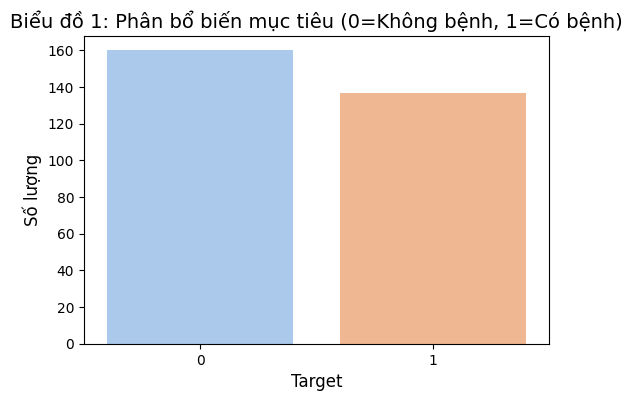

In [619]:
# Biểu đồ 1: Phân bổ biến mục tiêu 
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='pastel')
plt.title('Biểu đồ 1: Phân bổ biến mục tiêu (0=Không bệnh, 1=Có bệnh)', fontsize=14)
plt.xlabel('Target', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)


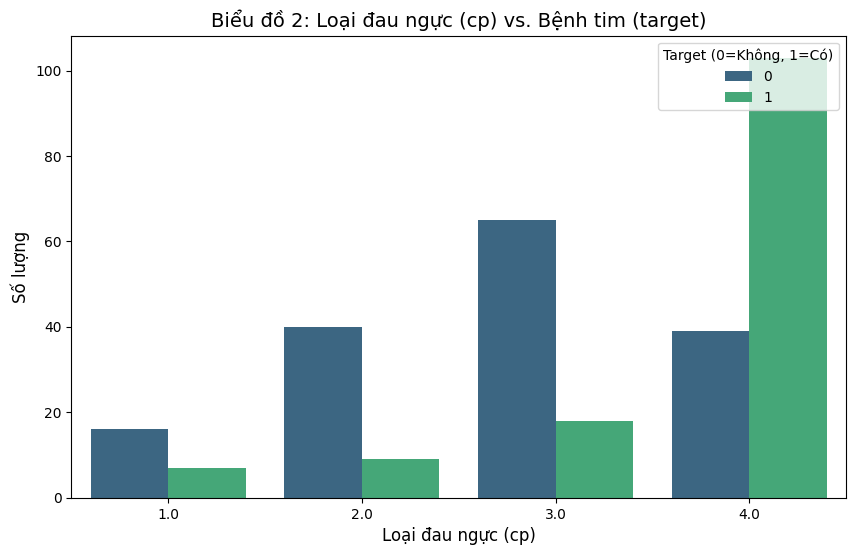

In [620]:
# Biểu đồ 2: Loại đau ngực (cp) và Bệnh tim (target)
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=df, palette='viridis')
plt.title('Biểu đồ 2: Loại đau ngực (cp) vs. Bệnh tim (target)', fontsize=14)
plt.xlabel('Loại đau ngực (cp)', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.legend(title='Target (0=Không, 1=Có)', loc='upper right')

#### Nhận xét:
1. Loại đau ngực 1.0, 2.0, và 3.0:

+ Trong cả ba nhóm này, cột màu xanh đậm (0 - Không bệnh) luôn cao hơn đáng kể so với cột màu xanh lá (1 - Có bệnh).

+ Ý nghĩa: Đa số những người có loại đau ngực 1, 2, hoặc 3 thực tế lại không được chẩn đoán mắc bệnh tim trong bộ dữ liệu này.

2. Loại đau ngực 4.0:

+ Cột màu xanh lá (1 - Có bệnh) cao vượt trội (khoảng 100 người) so với cột màu xanh đậm (0 - Không bệnh) (chỉ khoảng 40 người).

+ Ý nghĩa: Đa số những người thuộc nhóm "Loại đau ngực 4.0" có mắc bệnh tim.

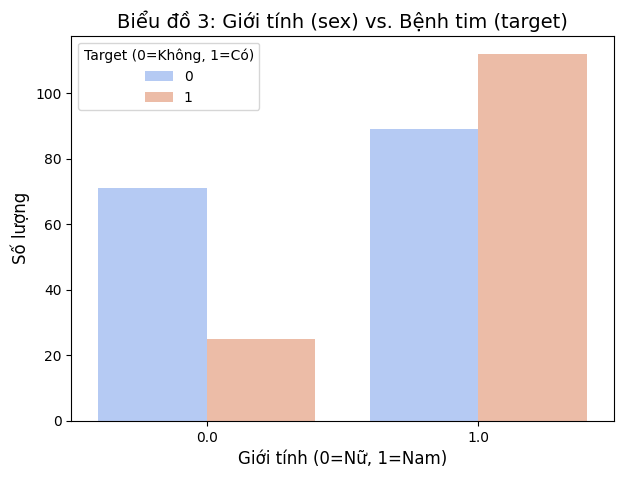

In [621]:
# Biểu đồ 3: Giới tính (sex) và Bệnh tim (target)
df['sex'] = df['sex'].astype('category')
plt.figure(figsize=(7, 5))
sns.countplot(x='sex', hue='target', data=df, palette='coolwarm')
plt.title('Biểu đồ 3: Giới tính (sex) vs. Bệnh tim (target)', fontsize=14)
plt.xlabel('Giới tính (0=Nữ, 1=Nam)', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.legend(title='Target (0=Không, 1=Có)')

#### Nhận xét:
1. Đối với Nữ giới (Nhóm 0.0):
+ Cột xanh (Không bệnh) cao hơn rõ rệt (khoảng 71 người).
+ Cột cam (Có bệnh) thấp hơn đáng kể (khoảng 25 người).
=> Kết luận 1: Trong bộ dữ liệu này, đa số phụ nữ (khoảng 74%) không mắc bệnh tim.
2. Đối với Nam giới (Nhóm 1.0):
+ Cột cam (Có bệnh) cao hơn (khoảng 114 người).
+ Cột xanh (Không bệnh) thấp hơn (khoảng 89 người).
=> Kết luận 2: Trong bộ dữ liệu này, nam giới có tỷ lệ mắc bệnh cao hơn (khoảng 56%) so với không mắc bệnh.

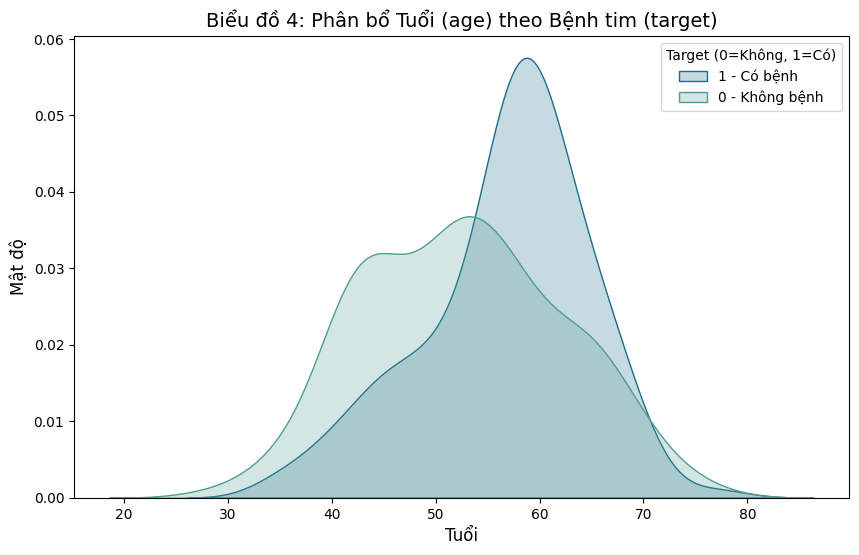

In [622]:
# Biểu đồ 4: Phân bổ Tuổi (age) theo Bệnh tim (target)
plt.figure(figsize=(10, 6))
# kdeplot (biểu đồ mật độ) rất tốt để xem phân bổ
sns.kdeplot(data=df, x='age', hue='target', fill=True, common_norm=False, palette='crest')
plt.title('Biểu đồ 4: Phân bổ Tuổi (age) theo Bệnh tim (target)', fontsize=14)
plt.xlabel('Tuổi', fontsize=12)
plt.ylabel('Mật độ', fontsize=12)
plt.legend(title='Target (0=Không, 1=Có)', labels=['1 - Có bệnh', '0 - Không bệnh'])

In [623]:
df['age'].describe()

count    297.000000
mean      54.542088
std        9.049736
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

#### Nhận xét:
1. Nhóm người Không bệnh có xu hướng trẻ hơn (tập trung nhiều ở 40-55 tuổi).

2. Nhóm người Có bệnh có xu hướng già hơn (tập trung nhiều ở khoảng 55-65 tuổi).

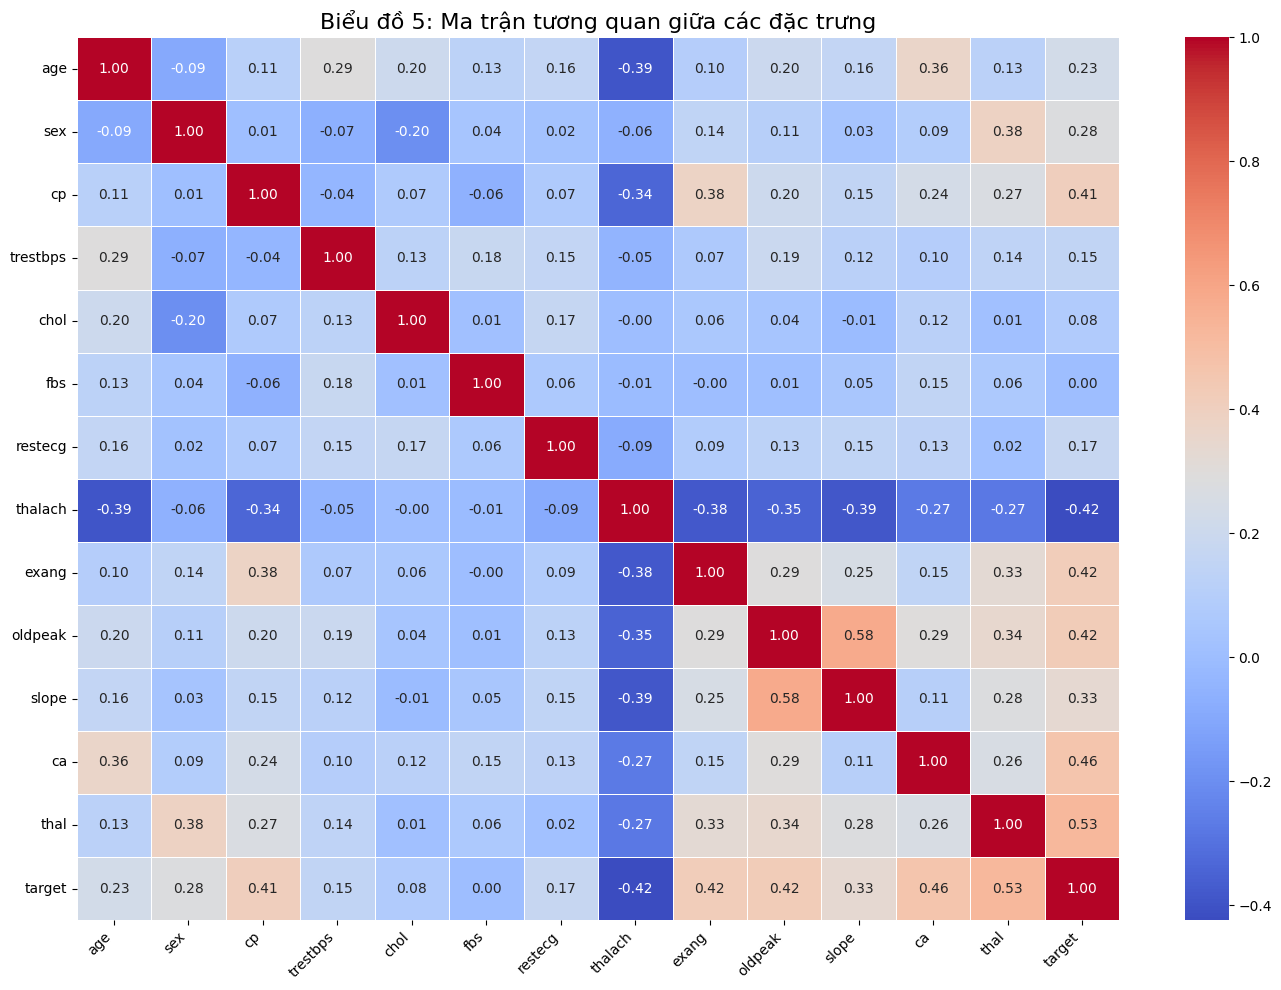

In [624]:
# Biểu đồ 5: Ma trận tương quan
# Chỉ chọn các cột số để tính toán tương quan
numeric_cols = df
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_cols.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Biểu đồ 5: Ma trận tương quan giữa các đặc trưng', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout() # Giúp các nhãn không bị cắt

#### Nhận xét
1. Dóng target ta thấy những thuộc tính tương quan âm, dương nhiều: cp, thalach, exang, oldpeak, slope, ca, thal
2. Bỏ qua target, chỉ quan tâm tới những thuộc tính khác xem có bị đa cộng tuyến không: Ta thấy oldpeak và slope tương quan với nhau 0.58 ở mức trung bình => cả hai trường vẫn bổ sung thông tin cho nhau
#### Tóm lại ta giữ lại các thuộc tính trên và thử thêm các thuộc tính như age, sex

## Data 14 trường

In [625]:
X = df.drop(columns=['target'])
y = df['target']
# KNN: 0.883
# DT - 3: 0.8
# RF - 7: 0.867
# LR : 0.833

In [626]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Data 7 trường

In [627]:
X = df.drop(columns=['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'target'])
y = df['target']
# KNN: 0.866
# DT - 3: 0.833
# RF - 7: 0.833
# LR : 0.85

## Data 7 trường thêm age

In [628]:
X = df.drop(columns=['sex', 'trestbps', 'chol', 'fbs', 'restecg', 'target'])
y = df['target']
# KNN: 0.883
# DT - 3: 0.85
# RF - 7: 0.867
# LR : 0.85


## Data 7 trường thêm sex

In [629]:
X = df.drop(columns=['age', 'trestbps', 'chol', 'fbs', 'restecg', 'target'])
y = df['target']
# KNN: 0.866
# DT - 3: 0.85
# RF - 3: 0.85
# LR : 0.866

## Data 7 trường thêm sex và age

In [630]:
X = df.drop(columns=['trestbps', 'chol', 'fbs', 'restecg', 'target'])
y = df['target']
# KNN: 0.85
# DT - 3: 0.833
# RF - none: 0.867
# LR : 0.866

## KNN

In [631]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier


In [632]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train.value_counts(normalize=True)

target
0    0.540084
1    0.459916
Name: proportion, dtype: float64

In [633]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
sklearn_knn = KNeighborsClassifier(n_neighbors=5)
sklearn_knn.fit(X_train_scaled, y_train)
sklearn_preds = sklearn_knn.predict(X_test_scaled)

print("scikit-learn KNN Accuracy:", accuracy_score(y_test, sklearn_preds))
print(classification_report(y_test, sklearn_preds))

scikit-learn KNN Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        32
           1       0.91      0.75      0.82        28

    accuracy                           0.85        60
   macro avg       0.86      0.84      0.85        60
weighted avg       0.86      0.85      0.85        60



## Decision Tree

In [634]:
from sklearn.tree import DecisionTreeClassifier



dt_model = DecisionTreeClassifier(
    criterion='gini',   # hoặc 'entropy'
    max_depth=10,     # có thể giới hạn độ sâu để tránh overfitting
    random_state=42
)

dt_model.fit(X_train_scaled, y_train)

# --- 5. Dự đoán ---
dt_preds = dt_model.predict(X_test_scaled)

# --- 6. Đánh giá ---
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

Decision Tree Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        32
           1       0.78      0.64      0.71        28

    accuracy                           0.75        60
   macro avg       0.76      0.74      0.74        60
weighted avg       0.75      0.75      0.75        60



In [635]:
for depth in [3, 5, 7, 10, None]:
    dt = DecisionTreeClassifier(criterion='gini',max_depth=depth, random_state=42)
    dt.fit(X_train_scaled, y_train)
    preds = dt.predict(X_test_scaled)
    print(f"max_depth={depth} → acc={accuracy_score(y_test, preds):.3f}")


max_depth=3 → acc=0.833
max_depth=5 → acc=0.750
max_depth=7 → acc=0.750
max_depth=10 → acc=0.750
max_depth=None → acc=0.750


## Random forest

In [636]:
from sklearn.ensemble import RandomForestClassifier


# --- 3. Khởi tạo mô hình Random Forest ---
rf_model = RandomForestClassifier(
    n_estimators=100,   # số lượng cây (thường 100–300 là đủ)
    criterion='gini',   # hoặc 'entropy'
    max_depth=None,     # có thể giới hạn để tránh overfitting
    random_state=42,
    n_jobs=-1           # dùng tất cả CPU cores để train nhanh hơn
)

# --- 4. Huấn luyện mô hình ---
rf_model.fit(X_train_scaled, y_train)

# --- 5. Dự đoán ---
rf_preds = rf_model.predict(X_test_scaled)

# --- 6. Đánh giá ---
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.88      0.82      0.85        28

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60



In [637]:
for depth in [3, 5, 7, 10, None]:
    rf = RandomForestClassifier(n_estimators=100,   # số lượng cây (thường 100–300 là đủ)
        criterion='gini',   # hoặc 'entropy'
        max_depth=depth,     # có thể giới hạn để tránh overfitting
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train_scaled, y_train)
    preds = rf.predict(X_test_scaled)
    print(f"max_depth={depth} → acc={accuracy_score(y_test, preds):.3f}")

max_depth=3 → acc=0.833
max_depth=5 → acc=0.850
max_depth=7 → acc=0.833
max_depth=10 → acc=0.867
max_depth=None → acc=0.867


## Logistic

In [638]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(
    solver='liblinear',   # thuật toán tối ưu (phù hợp với dữ liệu nhỏ/vừa)
    max_iter=1000,        # tăng số vòng lặp nếu dữ liệu khó hội tụ
    random_state=42
)

# --- 4. Huấn luyện mô hình ---
log_model.fit(X_train_scaled, y_train)

# --- 5. Dự đoán ---
log_preds = log_model.predict(X_test_scaled)

# --- 6. Đánh giá ---
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))
print(classification_report(y_test, log_preds))

Logistic Regression Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        32
           1       0.92      0.79      0.85        28

    accuracy                           0.87        60
   macro avg       0.88      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60

